In [7]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [8]:
from embedding_prediction_helpers import *

In [9]:
interaction_table

,query_gene,array_gene,gi_score,dmf
0,YAL001C,YBL023C,-0.0348,0.7319
1,YAL001C,YBL026W,-0.3529,0.4266
2,YAL001C,YBL076C,-0.0250,0.6458
3,YAL001C,YBL097W,-0.0808,0.3719
4,YAL001C,YBR029C,-0.1173,0.6289
...,...,...,...,...
1122249,YPR202W,YOR262W,-0.1490,0.6732
1122250,YPR202W,YPL007C,-0.0572,0.8877
1122251,YPR202W,YPL076W,0.0695,0.8590
1122252,YPR202W,YPL169C,0.0567,0.8677


## Used Embeddings : DNALM
- sequence features
- lm_3utr_emb
- lm_5utr_emb
- protein embeddings


In [10]:
embeddings = pd.read_csv('../../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')
embeddings

,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,ACG,...,data_Turco_expression_11808,data_Turco_expression_16247,data_Turco_expression_16248,data_Turco_expression_16249,data_Turco_expression_16250,data_Turco_expression_16683,data_Turco_expression_16684,data_Turco_expression_16685,data_Turco_expression_21888,data_Turco_expression_21932
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,0.011774,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,0.000000,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,0.013953,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,0.010101,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,0.007722,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,0.036697,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,0.005348,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,0.013605,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249


In [11]:
X, y = preprocess_data(embeddings)

## Linear Regression

Linear Regression
R2:  -7.199134079953106
RMSE: 0.37606717897896713


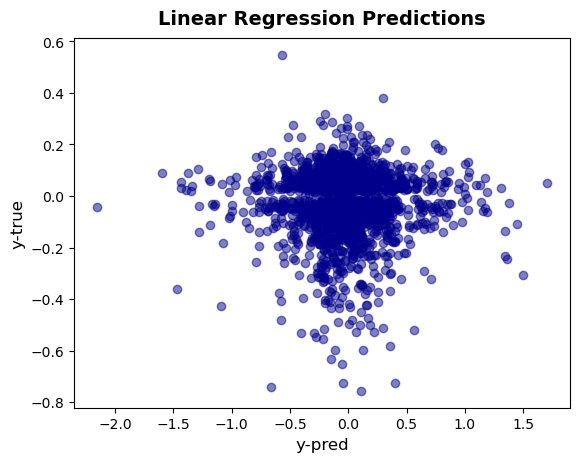

In [12]:
run_Linear_Regression(X, y, "darkblue")

0.8162466415015275


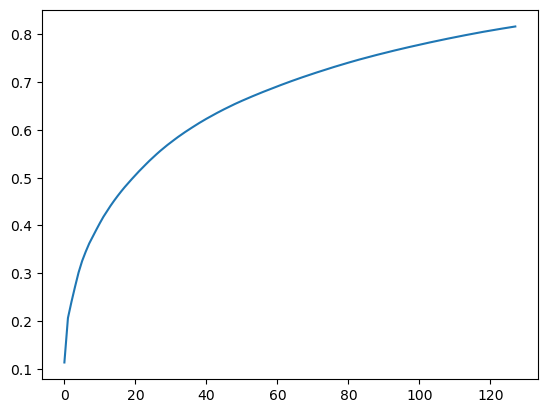

In [13]:
X_PCA = run_PCA(X)

## Linear Regression with PCA

Linear Regression
R2:  0.00889289704009133
RMSE: 0.13075001048787088


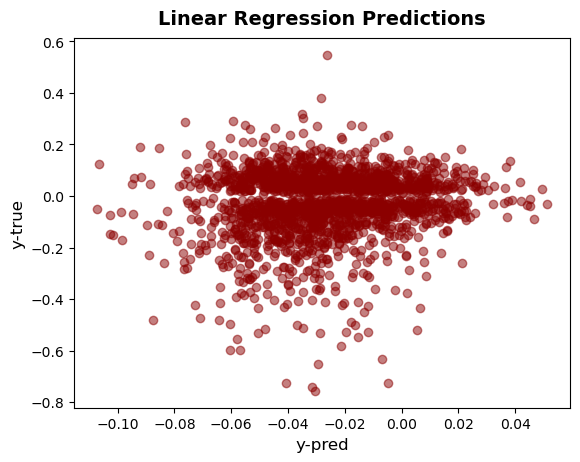

In [14]:
run_Linear_Regression(X_PCA, y, "darkred")

## XGBoost

XGBoost Regression
R2: -0.051
RMSE: 0.135


<Figure size 1000x600 with 0 Axes>

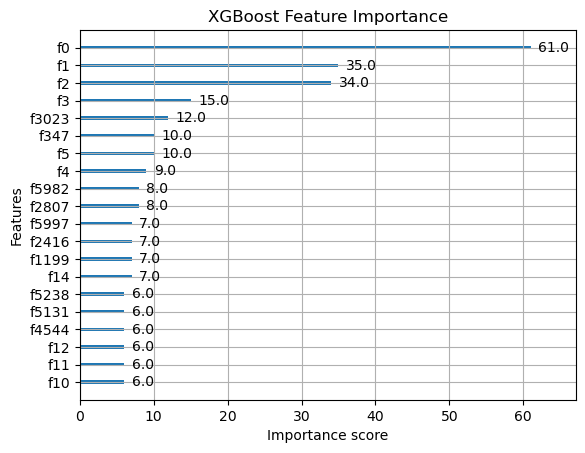

In [ ]:
run_XGBoost(X, y, embeddings)

## RandomForests

Random Forest Regression
Random Forest R² score: 0.003
Random Forest RMSE: 0.131


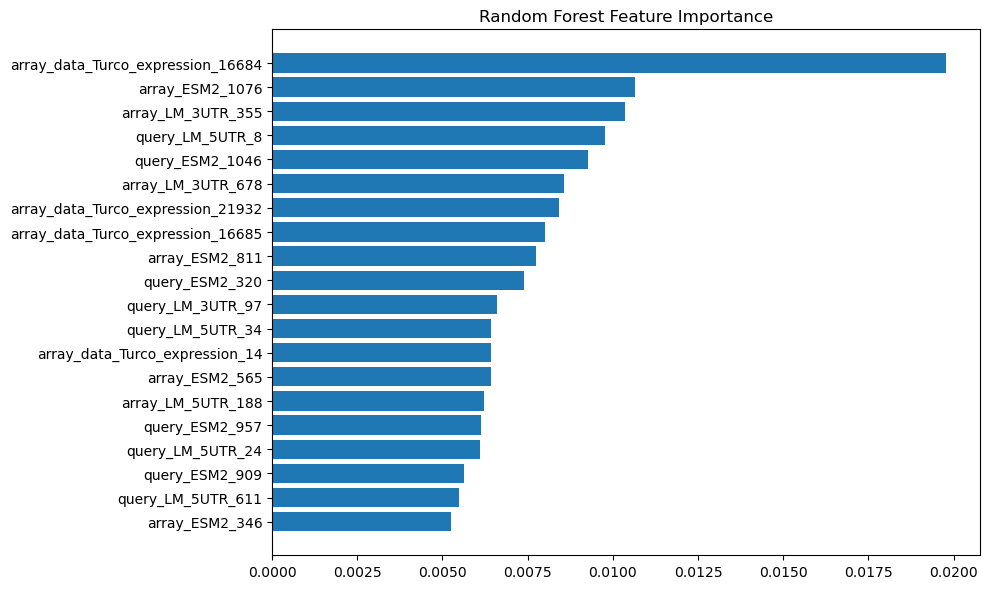

In [16]:
run_Random_Forest(X, y, embeddings)